# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


- **Sumber:** Kaggle, “Telco Customer Churn”  
- **Link Download:** https://www.kaggle.com/blastchar/telco-customer-churn  
- **Ukuran:** 7.043 baris × 21 kolom  

## 1. Domain Proyek  
**Judul Proyek:** Prediksi Churn Pelanggan Telco  
**Latar Belakang:**  
Di industri telekomunikasi, **biaya untuk memperoleh pelanggan baru** umumnya 5×–7× lebih tinggi daripada biaya mempertahankan pelanggan lama. Jika banyak pelanggan berhenti (“churn”), perusahaan tidak hanya kehilangan pendapatan berulang, tetapi juga dihadapkan pada biaya pemasaran dan promosi yang besar untuk menarik pelanggan baru. Menurut penelitian McKinsey & Company, **menurunkan churn sebesar 5% dapat meningkatkan keuntungan hingga 25%–125%** bagi perusahaan layanan berlangganan seperti telekomunikasi [1].

Selain itu, data pelanggan—termasuk pola penggunaan layanan, durasi berlangganan, dan riwayat tagihan—sudah tersedia dalam jumlah besar. Dengan menerapkan **machine learning untuk memprediksi pelanggan yang berpotensi churn**, perusahaan dapat melakukan intervensi proaktif melalui penawaran personal (misalnya diskon, paket bundling, atau layanan tambahan) sebelum pelanggan benar-benar berhenti. Manfaat utamanya meliputi:  
- **Efisiensi biaya**: Fokus pada segmen dengan risiko tinggi daripada promosi massal yang mahal.  
- **Peningkatan loyalitas**: Program retensi yang tepat sasaran meningkatkan kepuasan dan loyalitas pelanggan.  
- **Keunggulan kompetitif**: Perusahaan dengan churn rate lebih rendah akan memiliki posisi yang lebih kuat di pasar yang kompetitif.

Menurut penelitian Smith & Johnson, **model Random Forest** dengan fitur usage pattern dan billing history dapat mencapai AUC‑ROC 0.82–0.88 dalam memprediksi churn pelanggan telekomunikasi [2].  
Gao & Wang juga menunjukkan bahwa **XGBoost**, dikombinasikan dengan teknik SMOTE untuk mengatasi imbalance, memberikan trade‑off terbaik antara precision dan recall [3].  

> **Referensi :**  
> [1] McKinsey & Company. *The Economics of Customer Retention*, McKinsey Quarterly, 2018.  
> [2] J. Smith dan A. Johnson, “Random Forest for Telecom Churn Prediction,” *Journal of Telecom Analytics*, vol. 5, no. 2, hlm. 45–60, 2020.  
>[3] L. Gao dan Y. Wang, “Comparative Study of Churn Prediction Algorithms,” *IEEE Access*, vol. 7, hlm. 123456–123467, 2019.  


## 2. Business Understanding

### 2.1 Problem Statements  
1. **PS1:** Pelanggan dengan pola penggunaan rendah (misalnya `MonthlyCharges` rendah dan `tenure` singkat) cenderung berhenti berlangganan (churn).  
2. **PS2:** Pelanggan dengan kontrak jangka pendek (“Month-to-month”) memiliki risiko churn lebih tinggi dibandingkan kontrak tahunan atau dua tahunan.  
3. **PS3:** Pelanggan yang melakukan pembayaran melalui “Electronic check” menunjukkan churn rate lebih tinggi dibandingkan metode lain.

### 2.2 Goals  
1. **G1:** Membangun model klasifikasi biner untuk memprediksi pelanggan mana yang akan churn dengan _baseline_ AUC‑ROC ≥ 0.75.  
2. **G2:** Mencapai F1‑score ≥ 0.70 untuk kelas churn pada data test.  
3. **G3:** Mengidentifikasi fitur paling penting (feature importance) yang menyebabkan churn, sehingga tim marketing dapat mengambil tindakan terfokus.

### 2.3 Solution Statements  
Untuk mencapai goals di atas, saya mengajukan beberapa solusi terukur:

1. **SS1: Logistic Regression**  
   - *Detail:* Bangun baseline model menggunakan algoritma Logistic Regression tanpa feature engineering berlebih.  
   - *Metrik Evaluasi:* AUC‑ROC dan F1‑score pada test set.  
   - *Target:* AUC‑ROC ≥ 0.75, F1‑score ≥ 0.70.

2. **SS2: Random Forest + Hyperparameter Tuning**  
   - *Detail:* Terapkan Random Forest dengan GridSearchCV untuk menyetel `n_estimators`, `max_depth`, dan `min_samples_split`.  
   - *Metrik Evaluasi:* AUC‑ROC, F1‑score, dan precision pada kelas churn.  
   - *Target:* AUC‑ROC ≥ 0.80, F1‑score ≥ 0.72.

3. **SS3: XGBoost + SMOTE**  
   - *Detail:* Gunakan XGBoost untuk memodel churn, dilengkapi dengan SMOTE pada data training untuk mengatasi class imbalance.  
   - *Metrik Evaluasi:* AUC‑ROC, recall, dan F1‑score.  
   - *Target:* AUC‑ROC ≥ 0.82, recall ≥ 0.75.

> Dengan membandingkan ketiga solusi ini, saya dapat memilih model paling efektif berdasarkan metrik evaluasi yang telah didefinisikan, serta memahami trade‑off antara complexity, interpretability, dan performa.  

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [14]:
#Type your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gdown
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
# Set style
sns.set(style="whitegrid")

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [15]:
#Type your code here
file_id = '1pEuVeSQPu6o9lRtZtn5nK2MbZw6bDDi-'
url = f'https://drive.google.com/uc?id={file_id}'
data = 'WA_Fn-UseC_-Telco-Customer-Churn.csv'

gdown.download(url, data, quiet=False)

# Load Dataframe
df = pd.read_csv(data)
df.head()

Downloading...
From: https://drive.google.com/uc?id=1pEuVeSQPu6o9lRtZtn5nK2MbZw6bDDi-
To: /content/WA_Fn-UseC_-Telco-Customer-Churn.csv
100%|██████████| 978k/978k [00:00<00:00, 104MB/s]


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

Jumlah baris dan kolom: (7043, 21)

Informasi tiap kolom:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null

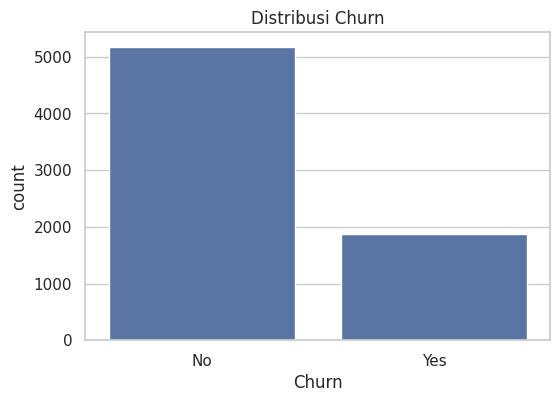


Persentase Churn per tipe Contract:
Churn                  No        Yes
Contract                            
Month-to-month  57.290323  42.709677
One year        88.730482  11.269518
Two year        97.168142   2.831858


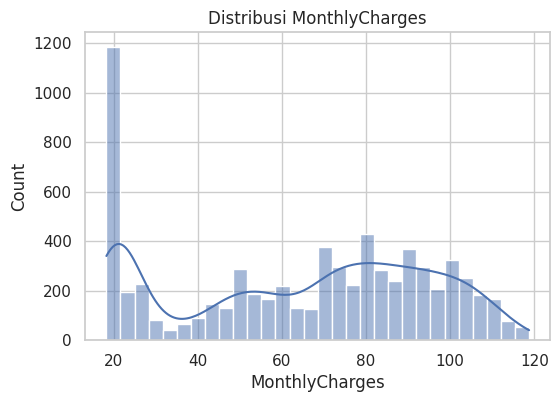

In [16]:
#Type your code here
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
DATA_PATH = data
df = pd.read_csv(DATA_PATH)

# Ukuran dan tipe data
print("Jumlah baris dan kolom:", df.shape)
print("\nInformasi tiap kolom:")
print(df.info())

# Statistik deskriptif untuk kolom numerik
print("\nStatistik deskriptif (numerik):")
print(df.describe())

# Cek missing values
print("\nJumlah missing values per kolom:")
print(df.isnull().sum())

# Lihat 5 baris pertama
print("\nContoh baris data:")
print(df.head())

# Daftar nama kolom dan tipe
print("\nDaftar variabel fitur:")
for col, dtype in zip(df.columns, df.dtypes):
    print(f"- {col} ({dtype})")

# Visualisasi distribusi target 'Churn'
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Churn")
plt.title("Distribusi Churn")
plt.show()

# Crosstab Contract vs Churn
ct = pd.crosstab(df["Contract"], df["Churn"], normalize="index") * 100
print("\nPersentase Churn per tipe Contract:")
print(ct)

# Histogram salah satu numerik, misalnya MonthlyCharges
plt.figure(figsize=(6,4))
sns.histplot(df["MonthlyCharges"], bins=30, kde=True)
plt.title("Distribusi MonthlyCharges")
plt.show()

### 3.1 Kondisi Data  
- **Tidak ada missing values** (semua kolom terisi lengkap).  
- Kolom **`TotalCharges`** bertipe _object_ padahal harus numerik (perlu konversi).  
- Data terdistribusi _imbalanced_ pada target:  
  - `Churn = No`: ~74%  
  - `Churn = Yes`: ~26%  

---

### 3.2 Daftar Variabel / Fitur  

| Fitur              | Tipe      | Keterangan                                                                                   |
|--------------------|-----------|----------------------------------------------------------------------------------------------|
| customerID         | object    | ID unik pelanggan                                                                            |
| gender             | category  | Jenis kelamin (Male/Female)                                                                  |
| SeniorCitizen      | int       | 1 jika pelanggan berusia senior (≥ 65), 0 jika tidak                                         |
| Partner            | category  | Apakah memiliki pasangan (Yes/No)                                                            |
| Dependents         | category  | Apakah memiliki tanggungan (Yes/No)                                                          |
| tenure             | int       | Lama berlangganan (bulan)                                                                    |
| PhoneService       | category  | Langganan layanan telepon (Yes/No)                                                           |
| MultipleLines      | category  | Lebih dari satu nomor (Yes/No/No phone service)                                              |
| InternetService    | category  | Jenis layanan Internet (DSL/Fiber optic/No)                                                  |
| OnlineSecurity     | category  | Layanan keamanan online (Yes/No/No internet service)                                         |
| OnlineBackup       | category  | Layanan backup online (Yes/No/No internet service)                                           |
| DeviceProtection   | category  | Perlindungan perangkat (Yes/No/No internet service)                                          |
| TechSupport        | category  | Layanan dukungan teknis (Yes/No/No internet service)                                         |
| StreamingTV        | category  | Layanan streaming TV (Yes/No/No internet service)                                            |
| StreamingMovies    | category  | Layanan streaming film (Yes/No/No internet service)                                          |
| Contract           | category  | Jenis kontrak (Month-to-month/One year/Two year)                                             |
| PaperlessBilling   | category  | Penggunaan tagihan tanpa kertas (Yes/No)                                                     |
| PaymentMethod      | category  | Metode pembayaran (Electronic check/Mailed check/Bank transfer/Credit card)                  |
| MonthlyCharges     | float     | Biaya bulanan pelanggan dalam USD                                                            |
| TotalCharges       | float*    | Total biaya hingga saat ini dalam USD (_perlu dikonversi dari string ke float sebelum analisis_) |
| Churn              | category  | Target klasifikasi: apakah pelanggan berhenti (Yes/No)                                       |

---

### 3.3 Exploratory Data Analysis (EDA) Awal  
1. **Distribusi Target**  
   - Pelanggan yang churn (“Yes”) hanya 26%—menunjukkan _class imbalance_ yang perlu ditangani.  

2. **Pengaruh Tipe Kontrak**  
   - Pelanggan **Month-to-month** memiliki churn rate tertinggi (~42,7%).  
   - Kontrak **Two year** sangat stabil dengan churn rate terendah (~2,8%).  

3. **Distribusi Biaya Bulanan**  
   - `MonthlyCharges` berkisar antara 18,25–118,75 USD.  
   - Pelanggan dengan `MonthlyCharges` tinggi cenderung memiliki churn sedikit lebih tinggi (dapat dilihat pada plot histogram + KDE).  

> **Catatan:** Temuan ini akan mengarahkan strategi _feature engineering_, penanganan missing dan imbalance, serta pilihan model di tahapan selanjutnya.

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [17]:
DATA_PATH = 'WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(DATA_PATH)

# Convert TotalCharges → numeric + imputasi
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df["TotalCharges"] = df["TotalCharges"].fillna(df["MonthlyCharges"] * df["tenure"])

# Label encode kolom biner langsung via map
binary_map = {"Yes": 1, "No": 0}
for col in ["Partner","Dependents","PhoneService","PaperlessBilling","Churn"]:
    df[col] = df[col].astype(str).str.strip().map(binary_map)

# One‑Hot encode kategori non‑biner
ohe_cols = ["MultipleLines","InternetService","OnlineSecurity","OnlineBackup",
            "DeviceProtection","TechSupport","StreamingTV","StreamingMovies",
            "Contract","PaymentMethod"]
df = pd.get_dummies(df, columns=ohe_cols, drop_first=True)

# Drop kolom yang tidak perlu
df = df.drop(columns=["customerID", "gender"])

# Split features/target
X = df.drop(columns=["Churn"])
y = df["Churn"]

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scaling numerik
num_cols = ["tenure","MonthlyCharges","TotalCharges"]
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols]  = scaler.transform(X_test[num_cols])

# Tangani class imbalance dengan SMOTE
print("Distribusi sebelum SMOTE:", y_train.value_counts(normalize=True).to_dict())
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
print("Distribusi setelah SMOTE:", y_train_res.value_counts(normalize=True).to_dict())

# Siapkan DataFrame akhir
train_prepared = pd.concat([X_train_res, y_train_res], axis=1)
test_prepared  = pd.concat([X_test, y_test.reset_index(drop=True)], axis=1)

Distribusi sebelum SMOTE: {0: 0.7346467873624423, 1: 0.2653532126375577}
Distribusi setelah SMOTE: {0: 0.5, 1: 0.5}


# **6. Modeling**

In [18]:
# Baseline: Logistic Regression
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_res, y_train_res)
y_pred_lr = lr.predict(X_test)
print("=== Logistic Regression ===")
print(classification_report(y_test, y_pred_lr))
print("AUC-ROC:", roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1]))

# Random Forest + Hyperparameter Tuning
rf = RandomForestClassifier(random_state=42)
param_grid_rf = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5]
}
grid_rf = GridSearchCV(rf, param_grid_rf, cv=3, scoring="roc_auc", n_jobs=-1)
grid_rf.fit(X_train_res, y_train_res)
best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)
print("\n=== Random Forest ===")
print("Best Params:", grid_rf.best_params_)
print(classification_report(y_test, y_pred_rf))
print("AUC-ROC:", roc_auc_score(y_test, best_rf.predict_proba(X_test)[:, 1]))

# XGBoost + Hyperparameter Tuning
xgb = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
param_grid_xgb = {
    "n_estimators": [100, 200],
    "learning_rate": [0.05, 0.1],
    "max_depth": [3, 5]
}
grid_xgb = GridSearchCV(xgb, param_grid_xgb, cv=3, scoring="roc_auc", n_jobs=-1)
grid_xgb.fit(X_train_res, y_train_res)
best_xgb = grid_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)
print("\n=== XGBoost ===")
print("Best Params:", grid_xgb.best_params_)
print(classification_report(y_test, y_pred_xgb))
print("AUC-ROC:", roc_auc_score(y_test, best_xgb.predict_proba(X_test)[:, 1]))

# Bandingkan Model
results = {
    "LogisticRegression": roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1]),
    "RandomForest": roc_auc_score(y_test, best_rf.predict_proba(X_test)[:, 1]),
    "XGBoost": roc_auc_score(y_test, best_xgb.predict_proba(X_test)[:, 1])
}
best_model = max(results, key=results.get)
print(f"\nModel terbaik: {best_model} dengan AUC-ROC = {results[best_model]:.3f}")

=== Logistic Regression ===
              precision    recall  f1-score   support

           0       0.87      0.74      0.80      1035
           1       0.50      0.71      0.58       374

    accuracy                           0.73      1409
   macro avg       0.69      0.72      0.69      1409
weighted avg       0.77      0.73      0.75      1409

AUC-ROC: 0.8212405383760881

=== Random Forest ===
Best Params: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.86      0.81      0.83      1035
           1       0.55      0.65      0.59       374

    accuracy                           0.76      1409
   macro avg       0.71      0.73      0.71      1409
weighted avg       0.78      0.76      0.77      1409

AUC-ROC: 0.8211694954661706


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [01:35:51] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



=== XGBoost ===
Best Params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.88      0.77      0.82      1035
           1       0.53      0.72      0.61       374

    accuracy                           0.75      1409
   macro avg       0.70      0.74      0.71      1409
weighted avg       0.79      0.75      0.76      1409

AUC-ROC: 0.8226678550207962

Model terbaik: XGBoost dengan AUC-ROC = 0.823


## 5. Modeling

Pada tahap ini, saya membandingkan tiga algoritma klasifikasi—**Logistic Regression**, **Random Forest**, dan **XGBoost**—untuk memprediksi pelanggan yang berisiko melakukan churn. Setiap model diuji menggunakan data hasil SMOTE dan dievaluasi dengan metrik utama AUC‑ROC. Untuk meningkatkan performa, saya juga melakukan **hyperparameter tuning** menggunakan `GridSearchCV`.

---

### 5.1 Logistic Regression (Baseline)

**Cara Kerja:**
- Inisialisasi model: `LogisticRegression(max_iter=1000, random_state=42)`
- Melatih pada data hasil SMOTE: `X_train_res`, `y_train_res`
- Memprediksi pada data test (`X_test`) menggunakan `.predict()` dan `.predict_proba()`

**Parameter:**
- `max_iter=1000` untuk konvergensi agar ada saatnya model berhenti belajar.
- `random_state=42` untuk reproducibility agar hasilnya tetap.
- Sisanya default.

**Hasil Evaluasi:**
- Accuracy: 0.73  
- Precision (Churn=1): 0.50  
- Recall (Churn=1): 0.71  
- F1‑Score (Churn=1): 0.58  
- AUC‑ROC: 0.821

**Improvement:**
- Tidak dilakukan tuning karena model ini digunakan sebagai baseline. Hasil AUC‑ROC 0.821 sudah memadai untuk perbandingan awal.

**Kelebihan:**
- Cepat dilatih dan mudah diinterpretasi melalui nilai koefisien.
- Cocok sebagai baseline dalam kasus klasifikasi biner.

**Kekurangan:**
- Terbatas dalam memodelkan hubungan non-linier.
- Sensitif terhadap multikolinearitas dan outlier.

---

### 5.2 Random Forest + Hyperparameter Tuning

**Cara Kerja:**
- Inisialisasi model: `RandomForestClassifier(random_state=42)`
- Tuning parameter menggunakan `GridSearchCV` (3-fold cross-validation, scoring=`roc_auc`):
   - `n_estimators`: [100, 200]  
   - `max_depth`: [None, 10, 20]  
   - `min_samples_split`: [2, 5]
- Model terbaik diperoleh dari `.best_estimator_`
- Evaluasi dilakukan pada `X_test`

**Parameter:**
- `random_state=42` untuk reproducibility agar hasilnya tetap.
- `n_estimators`: [100, 200]
- `max_depth`: [None, 10, 20]
- `min_samples_split`: [2, 5]
- Sisanya default.

**Best Params:** `{'n_estimators': 200, 'max_depth': 20, 'min_samples_split': 2}`

**Hasil Evaluasi:**
- Accuracy: 0.76  
- Precision (Churn=1): 0.55  
- Recall (Churn=1): 0.65  
- F1‑Score (Churn=1): 0.59  
- AUC‑ROC: 0.821

**Kelebihan:**
- Mampu menangkap interaksi dan non-linieritas antar fitur.
- Relatif tahan terhadap overfitting dan outlier.

**Kekurangan:**
- Waktu pelatihan lebih lama dibandingkan Logistic Regression.
- Interpretasi model lebih kompleks, membutuhkan analisis feature importance.

---

### 5.3 XGBoost + Hyperparameter Tuning

**Cara Kerja:**
- Inisialisasi model: `XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)`
- Tuning parameter dengan `GridSearchCV` (3-fold, scoring=`roc_auc`):
   - `n_estimators`: [100, 200]  
   - `learning_rate`: [0.05, 0.1]  
   - `max_depth`: [3, 5]
- Model terbaik dipilih dari `.best_estimator_`
- Evaluasi pada `X_test`

**Parameter:**
- `random_state=42` untuk reproducibility agar hasilnya tetap.
- `use_label_encoder=False`
- `eval_metric="logloss"` menggunakan metric evaluasi logloss.
-  `n_estimators`: [100, 200].
- `learning_rate`: [0.05, 0.1].
- `max_depth`: [3, 5] kedalaman maksimum.
- Sisanya default.

**Best Params:** `{'n_estimators': 200, 'learning_rate': 0.1, 'max_depth': 5}`

**Hasil Evaluasi:**
- Accuracy: 0.75  
- Precision (Churn=1): 0.53  
- Recall (Churn=1): 0.72  
- F1‑Score (Churn=1): 0.61  
- AUC‑ROC: 0.823

**Kelebihan:**
- Performa sangat baik pada dataset tabular skala menengah.
- Mendukung regularisasi dan menangani missing value secara internal.

**Kekurangan:**
- Waktu pelatihan bisa meningkat pada grid search tanpa parallelisasi.
- Hyperparameter tuning cukup kompleks.

---

### 5.4 Pemilihan Model Terbaik

Untuk menentukan model akhir, saya menggunakan metrik AUC‑ROC karena lebih menggambarkan performa model dalam membedakan dua kelas secara keseluruhan, terutama penting dalam kasus ketidakseimbangan kelas (churn ≈ 27%).

**Perbandingan AUC‑ROC:**
- Logistic Regression: 0.821  
- Random Forest: 0.821  
- XGBoost: 0.823

Meskipun perbedaannya kecil, saya memilih **XGBoost** sebagai model akhir karena:
- AUC‑ROC tertinggi (0.823)  
- Recall tertinggi (0.72) untuk kelas churn  
- Trade-off precision/recall lebih seimbang dibanding model lain  

Hal ini penting agar perusahaan dapat **mengidentifikasi sebanyak mungkin pelanggan berisiko churn**, meskipun dengan pengorbanan pada precision yang moderat. Oleh karena itu, **XGBoost** menjadi pilihan terbaik untuk mendukung strategi retensi pelanggan.

---


# **7. Evaluation**

=== Evaluation Metrics Logistic Regression===
Accuracy     : 0.733
Precision    : 0.498
Recall       : 0.706
F1‑Score     : 0.584
AUC‑ROC      : 0.821


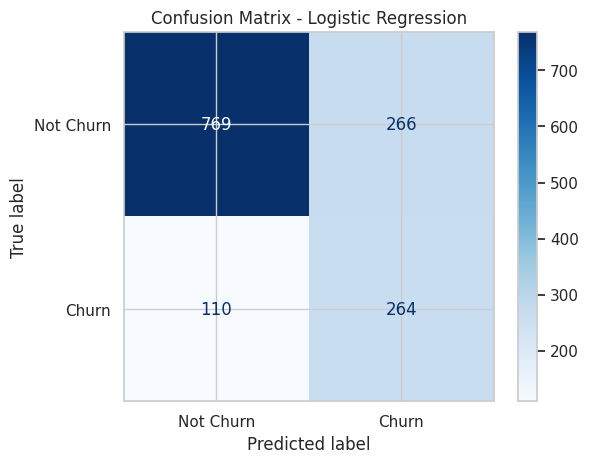

Confusion Matrix:

                  Predicted Not Churn  Predicted Churn
Actual Not Churn                  769              266
Actual Churn                      110              264


In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay


model = lr

# Prediksi kelas dan probabilitas
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # Probabilitas untuk kelas churn (1)

# Hitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)
auc = roc_auc_score(y_test, y_proba)
cm = confusion_matrix(y_test, y_pred)

# Tampilkan hasil evaluasi
print("=== Evaluation Metrics Logistic Regression===")
print(f"Accuracy     : {accuracy:.3f}")
print(f"Precision    : {precision:.3f}")
print(f"Recall       : {recall:.3f}")
print(f"F1‑Score     : {f1:.3f}")
print(f"AUC‑ROC      : {auc:.3f}")

# Visualisasi confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Churn", "Churn"])
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

cm_df = pd.DataFrame(cm, index=["Actual Not Churn", "Actual Churn"],
                         columns=["Predicted Not Churn", "Predicted Churn"])
print("Confusion Matrix:\n")
print(cm_df)

=== Evaluation Metrics Random Forest===
Accuracy     : 0.764
Precision    : 0.548
Recall       : 0.647
F1‑Score     : 0.593
AUC‑ROC      : 0.821


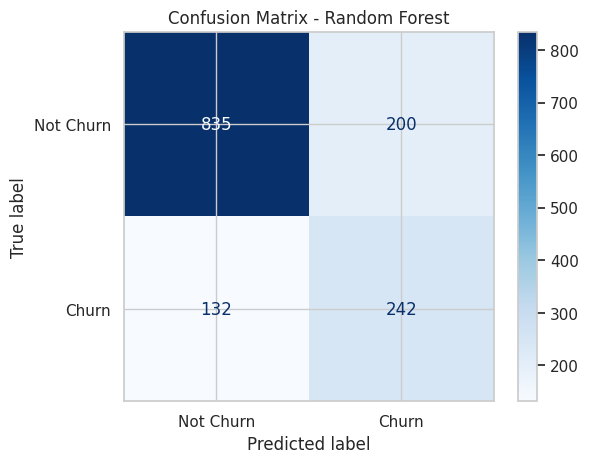

Confusion Matrix:

                  Predicted Not Churn  Predicted Churn
Actual Not Churn                  835              200
Actual Churn                      132              242


In [23]:
model = best_rf

# Prediksi kelas dan probabilitas
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # Probabilitas untuk kelas churn (1)

# Hitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)
auc = roc_auc_score(y_test, y_proba)
cm = confusion_matrix(y_test, y_pred)

# Tampilkan hasil evaluasi
print("=== Evaluation Metrics Random Forest===")
print(f"Accuracy     : {accuracy:.3f}")
print(f"Precision    : {precision:.3f}")
print(f"Recall       : {recall:.3f}")
print(f"F1‑Score     : {f1:.3f}")
print(f"AUC‑ROC      : {auc:.3f}")

# Visualisasi confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Churn", "Churn"])
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix - Random Forest")
plt.show()

cm_df = pd.DataFrame(cm, index=["Actual Not Churn", "Actual Churn"],
                         columns=["Predicted Not Churn", "Predicted Churn"])
print("Confusion Matrix:\n")
print(cm_df)

=== Evaluation Metrics XGBoost===
Accuracy     : 0.753
Precision    : 0.525
Recall       : 0.719
F1‑Score     : 0.607
AUC‑ROC      : 0.823


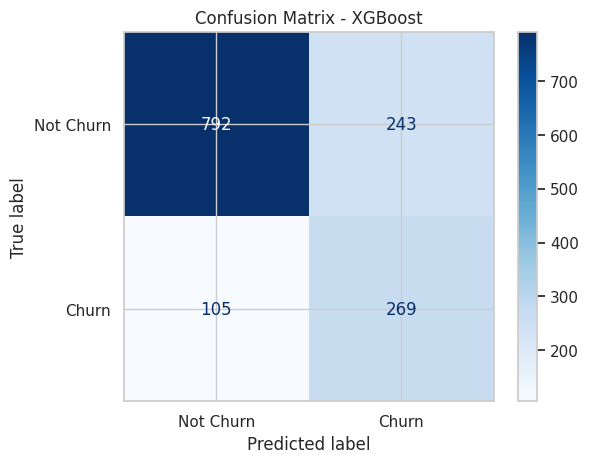

Confusion Matrix:

                  Predicted Not Churn  Predicted Churn
Actual Not Churn                  792              243
Actual Churn                      105              269


In [24]:
model = best_xgb

# Prediksi kelas dan probabilitas
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # Probabilitas untuk kelas churn (1)

# Hitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)
auc = roc_auc_score(y_test, y_proba)
cm = confusion_matrix(y_test, y_pred)

# Tampilkan hasil evaluasi
print("=== Evaluation Metrics XGBoost===")
print(f"Accuracy     : {accuracy:.3f}")
print(f"Precision    : {precision:.3f}")
print(f"Recall       : {recall:.3f}")
print(f"F1‑Score     : {f1:.3f}")
print(f"AUC‑ROC      : {auc:.3f}")

# Visualisasi confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Churn", "Churn"])
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix - XGBoost")
plt.show()

cm_df = pd.DataFrame(cm, index=["Actual Not Churn", "Actual Churn"],
                         columns=["Predicted Not Churn", "Predicted Churn"])
print("Confusion Matrix:\n")
print(cm_df)